# Why Standardize in linear regression?

Summary:
In linear regression, standardization helps with:

Interpreting coefficients on a comparable scale.

Ensuring that features contribute equally, especially if they are on different scales.

While standardization doesn't directly affect the final predictions (for a linear regression model), it ensures the model is more stable, interpretable, and effective in certain scenarios.


In [13]:
# %% [markdown]
# # Comparing Standardized and Unstandardized Linear Regression

# %% [markdown]
# ## 1. Import Required Libraries

# %%
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score


In [14]:

# %% [markdown]
# ## 2. Load and Inspect the Data

# %%
data = pd.read_csv('data/1.02. Multiple linear regression.csv')

# Preview the dataset
print(data.head())

# Summary statistics
print(data.describe())


    SAT  Rand 1,2,3   GPA
0  1714           1  2.40
1  1664           3  2.52
2  1760           3  2.54
3  1685           3  2.74
4  1693           2  2.83
               SAT  Rand 1,2,3        GPA
count    84.000000   84.000000  84.000000
mean   1845.273810    2.059524   3.330238
std     104.530661    0.855192   0.271617
min    1634.000000    1.000000   2.400000
25%    1772.000000    1.000000   3.190000
50%    1846.000000    2.000000   3.380000
75%    1934.000000    3.000000   3.502500
max    2050.000000    3.000000   3.810000


In [15]:

# %% [markdown]
# ## 3. Define Features and Target

# %%
# Independent variables
X = data[['SAT', 'Rand 1,2,3']]

# Dependent variable
y = data['GPA']

# %% [markdown]
# ## 4. Fit a Model Without Standardization

# %%
# Instantiate and fit a raw (unstandardized) regression
reg_raw = LinearRegression()
reg_raw.fit(X, y)

# Extract coefficients and intercept
coef_raw = reg_raw.coef_
intercept_raw = reg_raw.intercept_


In [22]:
print(coef_raw)
print(intercept_raw)

[ 0.00165354 -0.00826982]
0.29603261264909486


In [23]:

# %% [markdown]
# ## 5. Standardize the Predictors and Fit a Model

# %%
# Standardize the predictors
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Fit model on scaled features
reg_scaled = LinearRegression()
reg_scaled.fit(X_scaled, y)

# Extract coefficients and intercept
coef_scaled = reg_scaled.coef_
intercept_scaled = reg_scaled.intercept_

print(coef_scaled)
print(intercept_scaled)


[ 0.17181389 -0.00703007]
3.330238095238095


In [17]:

# %% [markdown]
# ## 6. Compare Model Fit Metrics

# %%
# Predictions on training data
y_pred_raw = reg_raw.predict(X)
y_pred_scaled = reg_scaled.predict(X_scaled)

# R-squared scores
r2_raw = r2_score(y, y_pred_raw)
r2_scaled = r2_score(y, y_pred_scaled)

# Adjusted R-squared
def adjusted_r2(r2, n, k):
    return 1 - (1 - r2) * (n - 1) / (n - k - 1)

n, k = X.shape
adj_r2_raw = adjusted_r2(r2_raw, n, k)
adj_r2_scaled = adjusted_r2(r2_scaled, n, k)

# Collect metrics in a table
model_metrics = pd.DataFrame({
    'Model': ['Raw', 'Standardized'],
    'R-squared': [r2_raw, r2_scaled],
    'Adjusted R-squared': [adj_r2_raw, adj_r2_scaled]
})
print(model_metrics)


          Model  R-squared  Adjusted R-squared
0           Raw   0.406681            0.392031
1  Standardized   0.406681            0.392031


In [18]:

# %% [markdown]
# ## 7. Compare Regression Coefficients

# %%
coef_comparison = pd.DataFrame({
    'Feature': ['Intercept', 'SAT', 'Rand 1,2,3'],
    'Raw Coefficients': np.append(intercept_raw, coef_raw),
    'Standardized Coefficients': np.append(intercept_scaled, coef_scaled)
})
print(coef_comparison)


      Feature  Raw Coefficients  Standardized Coefficients
0   Intercept          0.296033                   3.330238
1         SAT          0.001654                   0.171814
2  Rand 1,2,3         -0.008270                  -0.007030


In [19]:

# %% [markdown]
# ## 8. Predict on New Observations

# %%
# Create a new dataframe with new observations
new_data = pd.DataFrame([[1700, 2], [1800, 1]], columns=['SAT', 'Rand 1,2,3'])

# Predictions without standardization
pred_raw = reg_raw.predict(new_data)

# Standardize new observations using same scaler
new_data_scaled = scaler.transform(new_data)
pred_scaled = reg_scaled.predict(new_data_scaled)

# Combine into summary table
pred_summary = new_data.copy()
pred_summary['Prediction (Raw)'] = pred_raw
pred_summary['Prediction (Standardized)'] = pred_scaled
print(pred_summary)


    SAT  Rand 1,2,3  Prediction (Raw)  Prediction (Standardized)
0  1700           2          3.090514                   3.090514
1  1800           1          3.264138                   3.264138


In [20]:

# %% [markdown]
# ## 9. Compare Predictions Across a Range of SAT Values

# %%
# Fix Rand 1,2,3 = 2 and vary SAT
sat_range = np.linspace(1000, 2000, 10)
comparison_data = pd.DataFrame({
    'SAT': sat_range,
    'Rand 1,2,3': 2  # fixed value
})

# Raw prediction
comparison_data['Pred (Raw)'] = reg_raw.predict(comparison_data)

# Standardized prediction (only standardize input features)
comparison_scaled = scaler.transform(comparison_data[['SAT', 'Rand 1,2,3']])
comparison_data['Pred (Standardized)'] = reg_scaled.predict(comparison_scaled)


print(comparison_data)


           SAT  Rand 1,2,3  Pred (Raw)  Pred (Standardized)
0  1000.000000           2    1.933035             1.933035
1  1111.111111           2    2.116762             2.116762
2  1222.222222           2    2.300489             2.300489
3  1333.333333           2    2.484215             2.484215
4  1444.444444           2    2.667942             2.667942
5  1555.555556           2    2.851669             2.851669
6  1666.666667           2    3.035396             3.035396
7  1777.777778           2    3.219123             3.219123
8  1888.888889           2    3.402850             3.402850
9  2000.000000           2    3.586577             3.586577


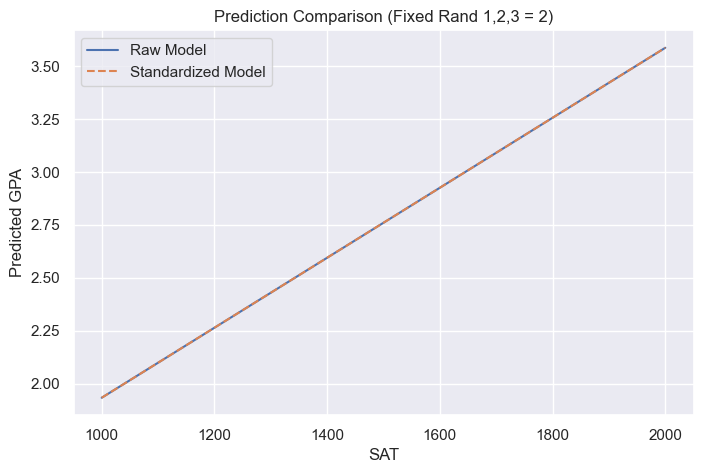

In [21]:

# %% [markdown]
# ## 10. Optional: Visual Comparison of Prediction Lines

# %%
plt.figure(figsize=(8, 5))
plt.plot(comparison_data['SAT'], comparison_data['Pred (Raw)'], label='Raw Model')
plt.plot(comparison_data['SAT'], comparison_data['Pred (Standardized)'], linestyle='--', label='Standardized Model')
plt.xlabel('SAT')
plt.ylabel('Predicted GPA')
plt.title('Prediction Comparison (Fixed Rand 1,2,3 = 2)')
plt.legend()
plt.grid(True)
plt.show()


# No difference in predictions

### The Role of Standardization

Standardization (or feature scaling) transforms the features (independent variables) so that they have a mean of 0 and a standard deviation of 1. This makes the coefficients of the regression model comparable across features, which is particularly useful when the features are on different scales (e.g., `SAT` scores ranging from 1000 to 2000, and `Rand 1,2,3` ranging from 1 to 5).

### Impact on Model Coefficients

* **Unstandardized Model (Raw)**: In this model, the features (`SAT` and `Rand 1,2,3`) are used as-is, with their original scales. The model learns coefficients that reflect the relationship between these raw features and the target variable (in your case, GPA).

* **Standardized Model**: In the standardized model, the features are scaled to have a mean of 0 and a standard deviation of 1. This means the model will learn coefficients that are related to the *standardized* values of the features. These coefficients tell you how much the target variable (GPA) changes in response to a one-standard-deviation change in each feature.

### Why the Predictions Might Be Similar

Now, both models are trained to minimize the same objective: **mean squared error (MSE)**. MSE measures how far the predicted values are from the actual values. Regardless of whether the features are raw or standardized, the model tries to find the best line (or hyperplane in higher dimensions) that fits the data to minimize this error.

* **Linear Models**: In a simple linear regression, the relationship between the predictors and the target is linear. So, the **predictions** will be similar in both models, even though the coefficients might differ in scale. Essentially, the scaling of the coefficients doesn’t significantly alter the overall relationship between the predictors and the target variable.

* **Why the Outputs Align**: Because both models are trained on the same data and minimize the same error (MSE), they are trying to fit the best line to the data. The standardization only changes how the coefficients are expressed, not the underlying relationship between the variables. Hence, the **predictions will generally be very similar**, especially when the feature scales aren't drastically different.

### Example:

* **Unstandardized Coefficients**: Let's say the unstandardized coefficients are:

  * Coefficient for `SAT` = 0.003
  * Coefficient for `Rand 1,2,3` = 0.1

  These coefficients mean that for every unit increase in `SAT` (i.e., 1 point increase), the GPA is expected to increase by 0.003, and for each unit increase in `Rand 1,2,3`, GPA is expected to increase by 0.1.

* **Standardized Coefficients**: After standardization, the coefficients might be:

  * Coefficient for `SAT` = 0.5
  * Coefficient for `Rand 1,2,3` = 0.2

  These coefficients reflect the change in GPA for a one standard deviation change in `SAT` or `Rand 1,2,3`. Since standardization puts features on the same scale, the coefficients become more comparable across features.

However, **the relationship between GPA and `SAT` and `Rand 1,2,3` remains the same**, and thus the predictions from both models are likely to be similar, even though the coefficients are expressed in different units (standardized vs raw).

### In Short:

* **Standardization alters the scale of coefficients**, but the linear relationships learned by the model remain unchanged.
* **Predictions are driven by these relationships**, not by the scale of coefficients. Hence, the predictions are often similar in both the standardized and unstandardized models.
